In [1]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
if torch.cuda.is_available():
    print("Running on GPU:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU")

Running on GPU: NVIDIA GeForce GTX 1080 Ti


In [2]:
!pip install --upgrade diffusers transformers -q
!pip install accelerate -q

In [3]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import cv2
     

2024-06-20 13:36:47.973437: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 13:36:48.726038: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-06-20 13:36:48.726096: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-06-20 13:36:48.726104: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [4]:
class TIG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    img_gen_steps = 35
    img_gen_model_id = "CompVis/stable-diffusion-v1-4"
    img_gen_size = (398,398)
    img_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [5]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [6]:
img_gen_model = StableDiffusionPipeline.from_pretrained(
    TIG.img_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", guidance_scale=9
)
img_gen_model = img_gen_model.to(TIG.device)

safety_checker/model.safetensors not found
Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/kunuruabhishek/anaconda3/envs/pytorch/lib/python3.7/site-packages/transformers/models/clip/feature_extraction_clip.py:31: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  FutureWarning,
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [7]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=TIG.img_gen_steps,
        generator=TIG.generator,
        guidance_scale=TIG.img_gen_guidance_scale
    ).images[0]
    
    image = image.resize(TIG.img_gen_size)
    return image

  0%|          | 0/35 [00:00<?, ?it/s]

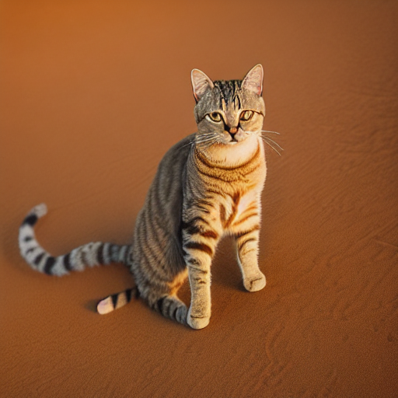

In [8]:
generate_image("cat in sahara desert", img_gen_model)